In [1]:
import cmath
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns
from dppy.beta_ensembles import CircularEnsemble
import matplotlib.pyplot as plt

circular = CircularEnsemble(beta=1)

import RMT # Importing the RMT module

In [2]:
# Set parameters
Size = 200           # Matrix size (e.g., 50x50)
Samples = 10000       # Number of samples
Lower = 0           # Histogram lower bound
Upper = 5         # Histogram upper bound
binno = 100          # Number of histogram bins
p = 1.00               # Thinning probability (1 = no thinning)

In [3]:
# Check if there's a folder called ThinnedEigenvalues
import os
if not os.path.exists("ThinnedEigenvalues"):
    os.makedirs("ThinnedEigenvalues")

EigenFrame = RMT.EigenGen(Size, Samples)

Progress: 0.0%
Progress: 5.0%
Progress: 10.0%
Progress: 15.0%
Progress: 20.0%
Progress: 25.0%
Progress: 30.0%
Progress: 35.0%
Progress: 40.0%
Progress: 45.0%
Progress: 50.0%
Progress: 55.0%
Progress: 60.0%
Progress: 65.0%
Progress: 70.0%
Progress: 75.0%
Progress: 80.0%
Progress: 85.0%
Progress: 90.0%
Progress: 95.0%


In [4]:
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt


# Define p values: 0.01, 0.02, ..., 0.99
PRange = [(x + 1) / 100 for x in range(99)]
ThinnedDict = {}
print("Starting p-range processing...")

# Wrap the loop with tqdm
for p in tqdm(PRange, desc="Processing thinning levels"):
    runframe = np.copy(EigenFrame)
    data = RMT.EigenThin(runframe, p)
    
    if len(data) == 0:
        # Optionally still warn, or just skip silently
        continue  # Skip saving if no data

    
    
    hist, bins = np.histogram(data, range=(Lower, Upper), bins=binno, weights=1/len(data)* np.ones(len(data)))
    # Area under the histogram should be 1
    bin_width = np.diff(bins)[0]
    HistArea = np.sum(hist * bin_width)
    hist = hist / HistArea
    HistAreaTest = np.sum(hist * bin_width)
    assert np.isclose(HistAreaTest, 1), f"Histogram area is not 1 for p = {p}."

    # if p is a multiple of 0.1, print the length of hist and binedges
    # if p % 0.2 == 0:
        
    #     sns.histplot(data, bins=bins, kde=True, stat="density")
    #     # Add title
    #     plt.title(f"Thinned Eigenvalues (p={p:.2f})")
    #     plt.show()

    #     sns.scatterplot(x=bins[:-1], y=hist, marker='o')
    #     plt.title(f"Histogram of Gaps (p={p:.2f})")
    #     plt.show()

    # Save histogram to thinned dict
    p = round(p, 2)  # Round p to two decimal places for cleaner keys
    ThinnedDict[p] = hist
    
    #print(len(hist), len(binedges))
    filename = f"ThinnedEigenvalues/Thin_{p:.2f}.csv"  # Nice clean filenames
    np.savetxt(filename, hist, delimiter=",")

print("Finished processing all p values.")

Starting p-range processing...


Processing thinning levels: 100%|██████████| 99/99 [01:13<00:00,  1.35it/s]

Finished processing all p values.


Mean after normalization: 1.0
Saved normalized exponential samples to ThinnedEigenvalues/Thin_0.00.csv.


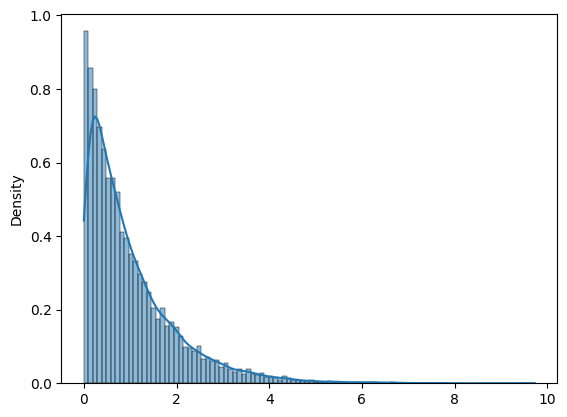

In [5]:
import numpy as np
# Generate random exponential samples
Exp = np.random.exponential(scale=1.0, size=10000)

# Normalize to have mean = 1
Exp /= np.mean(Exp)
print(f"Mean after normalization: {np.mean(Exp)}")

sns.histplot(data=Exp, bins=binno, kde=True, stat="density")

# Area under the histogram of exponential samples should be 1
hist_exp, bins = np.histogram(Exp, range=(Lower, Upper), bins=binno, weights=1/len(Exp)* np.ones(len(Exp)))
# Area under the histogram should be 1
bin_width = np.diff(bins)[0]
HistArea = np.sum(hist_exp * bin_width)
hist_exp = hist_exp / HistArea
HistAreaTest = np.sum(hist_exp * bin_width)
assert np.isclose(HistAreaTest, 1), "Histogram area is not 1."

ThinnedDict[0.00] = hist_exp
ThinnedDict["Bins"] = bins[:-1]  # Store bin edges for reference

# Save to file
p = 0.00
filename = f"ThinnedEigenvalues/Thin_{p:.2f}.csv"
np.savetxt(filename, hist_exp, delimiter=",")
print(f"Saved normalized exponential samples to {filename}.")

In [6]:
#import RMT

arabidopsis_Interorigin_spacing.csv
Extracting File:  arabidopsis
Creating Histogram for:  arabidopsis
1.0
Plotting DNA and Thinned for:  arabidopsis


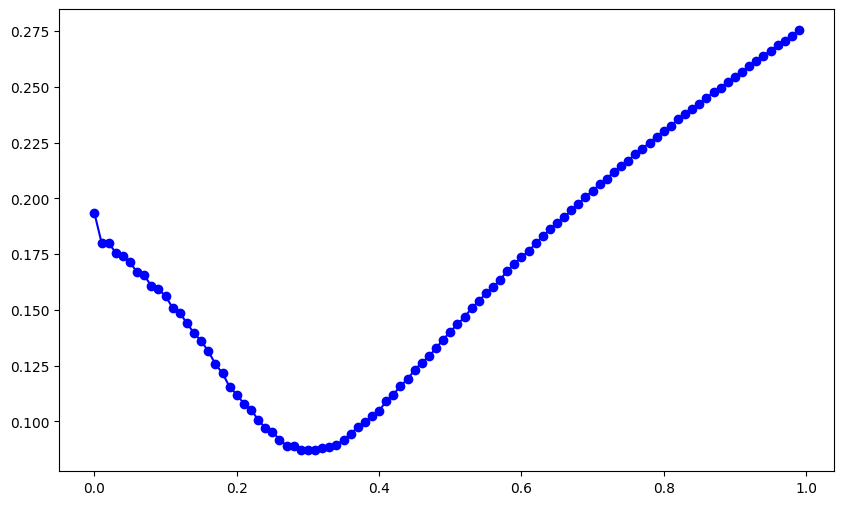

Minimum p value in coarse search: 0.3 with RMSE: 0.08699507278731305


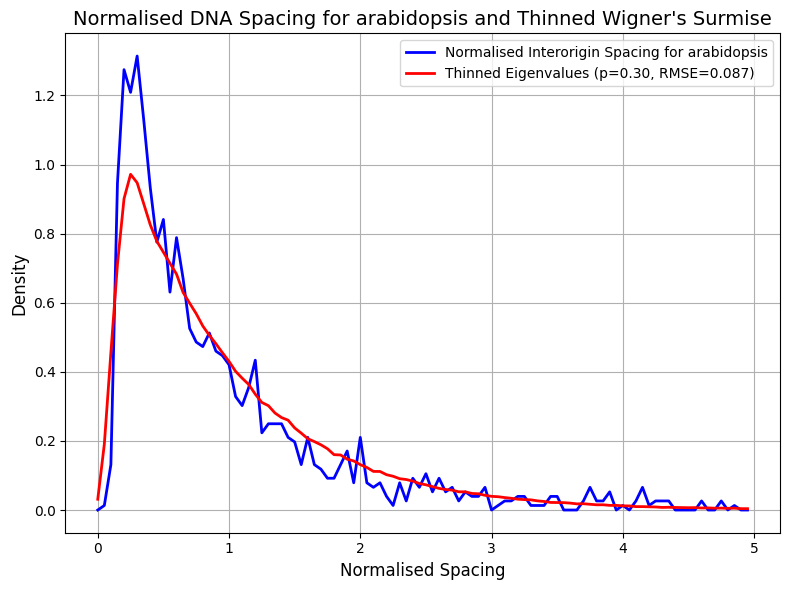

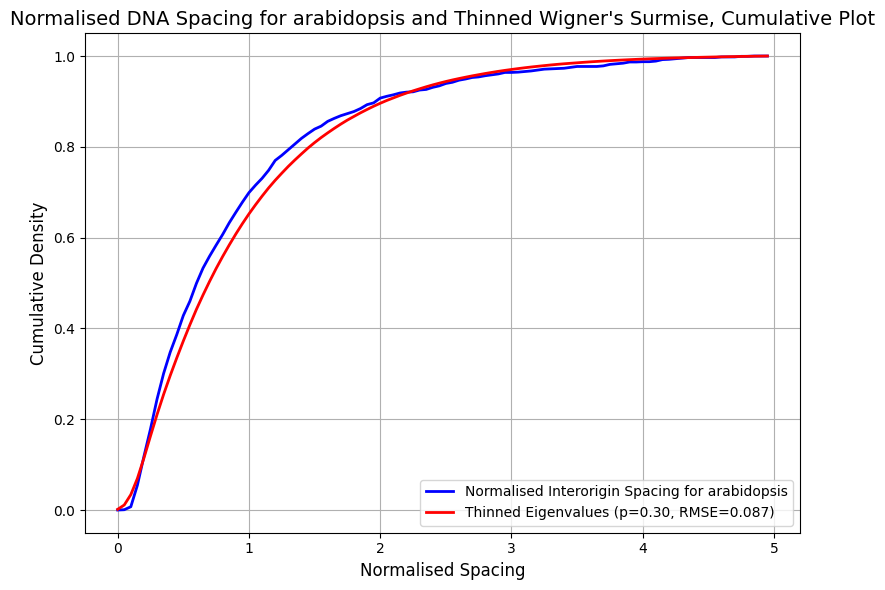

Done with:  arabidopsis


candida_CBS138_Interorigin_spacing.csv
Extracting File:  candida_CBS138
Creating Histogram for:  candida_CBS138
1.0
Plotting DNA and Thinned for:  candida_CBS138


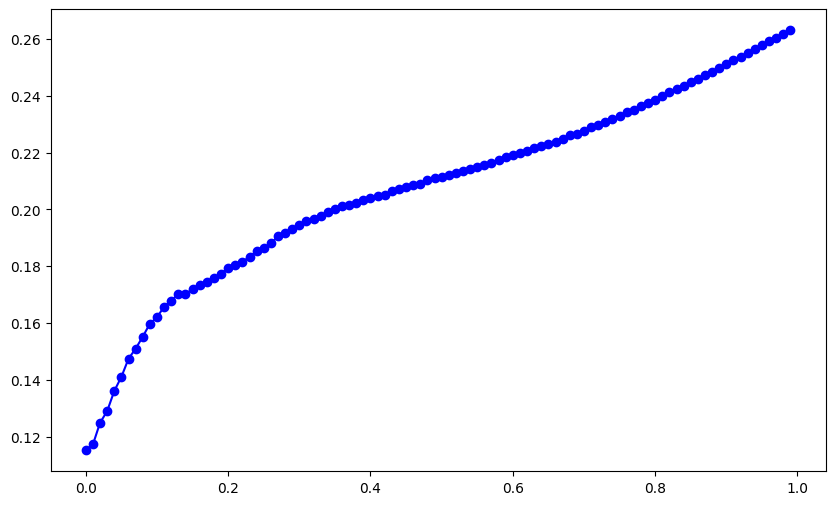

Minimum p value in coarse search: 0.0 with RMSE: 0.11523677290145252


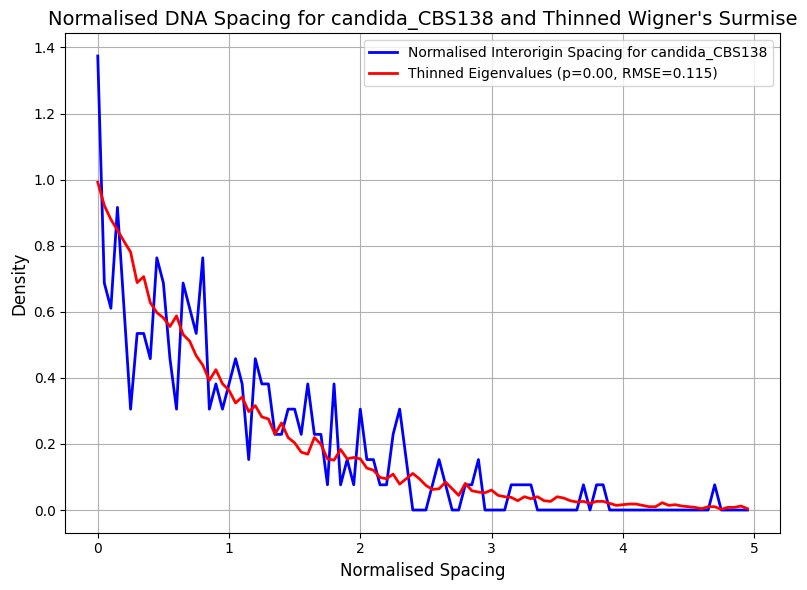

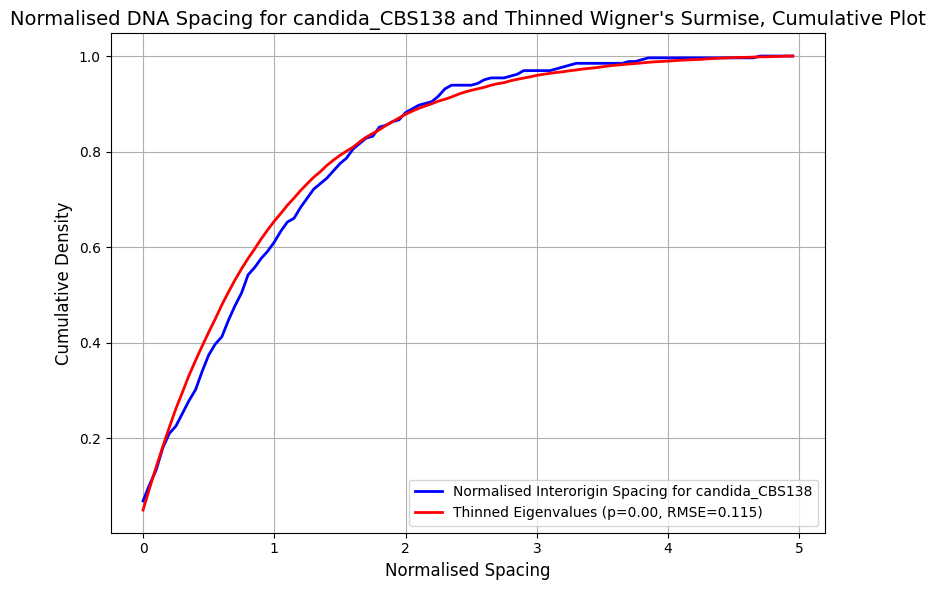

Done with:  candida_CBS138


drosophila_Kc_Interorigin_spacing.csv
Extracting File:  drosophila_Kc
Creating Histogram for:  drosophila_Kc
1.0
Plotting DNA and Thinned for:  drosophila_Kc


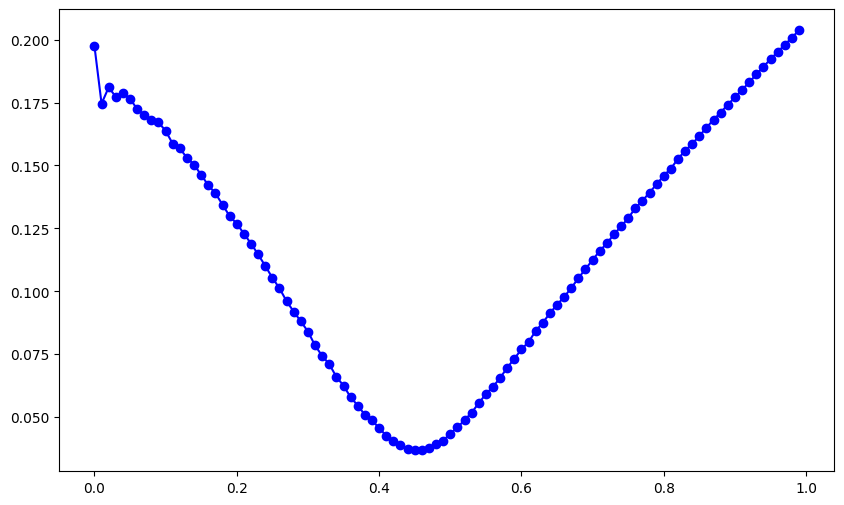

Minimum p value in coarse search: 0.46 with RMSE: 0.036840389739680734


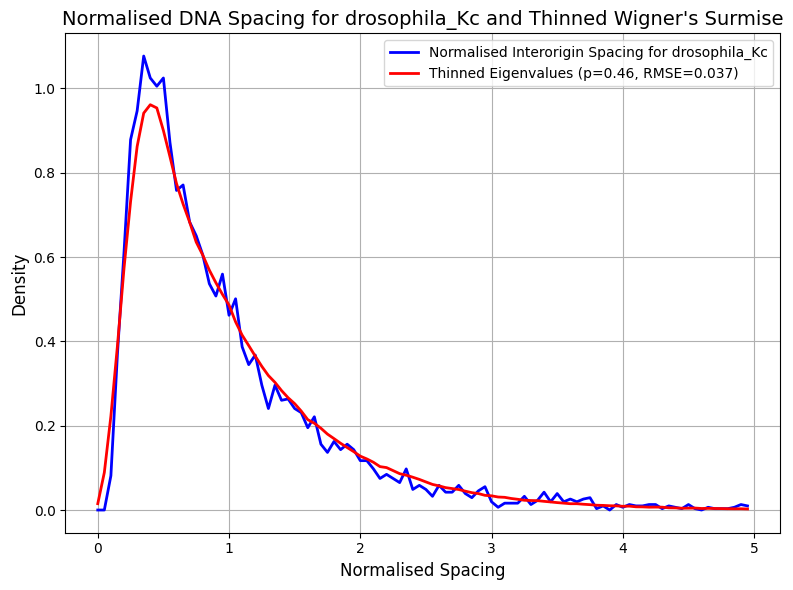

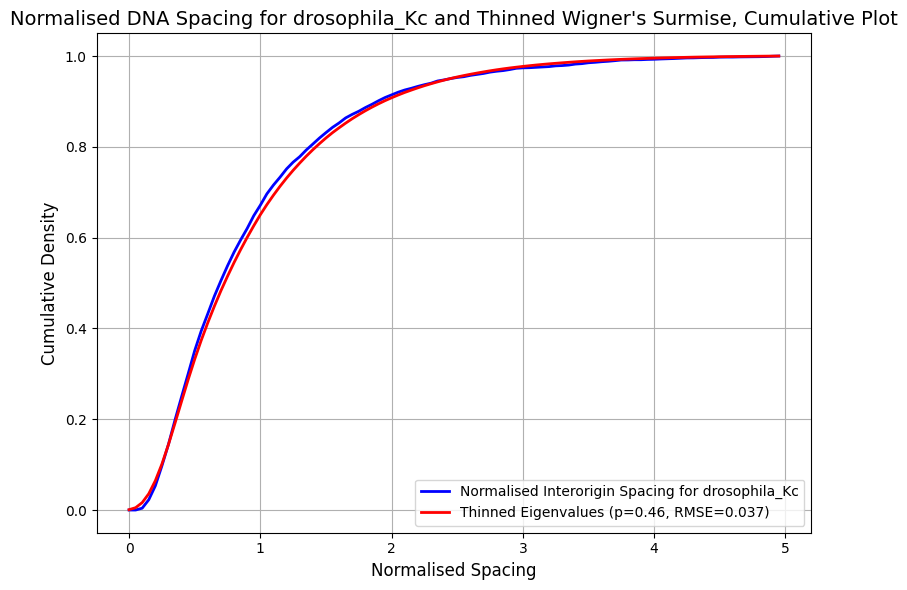

Done with:  drosophila_Kc


drosophila_S2_Interorigin_spacing.csv
Extracting File:  drosophila_S2
Creating Histogram for:  drosophila_S2
1.0
Plotting DNA and Thinned for:  drosophila_S2


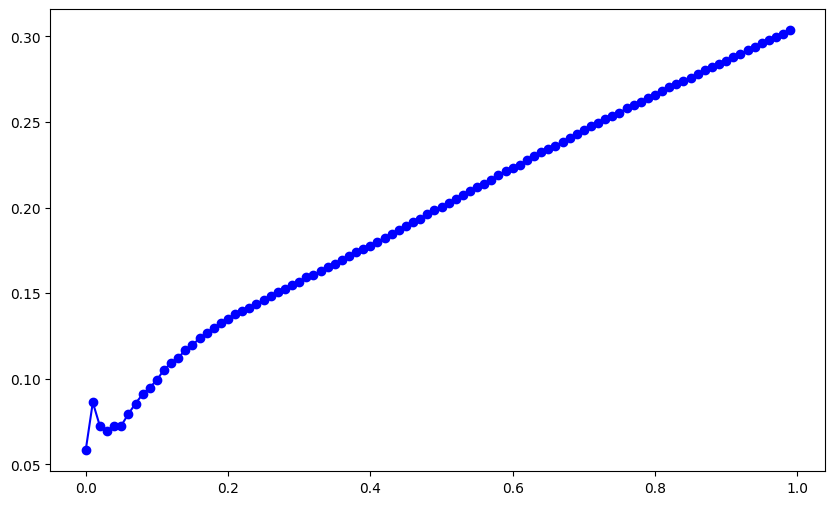

Minimum p value in coarse search: 0.0 with RMSE: 0.05826114800560771


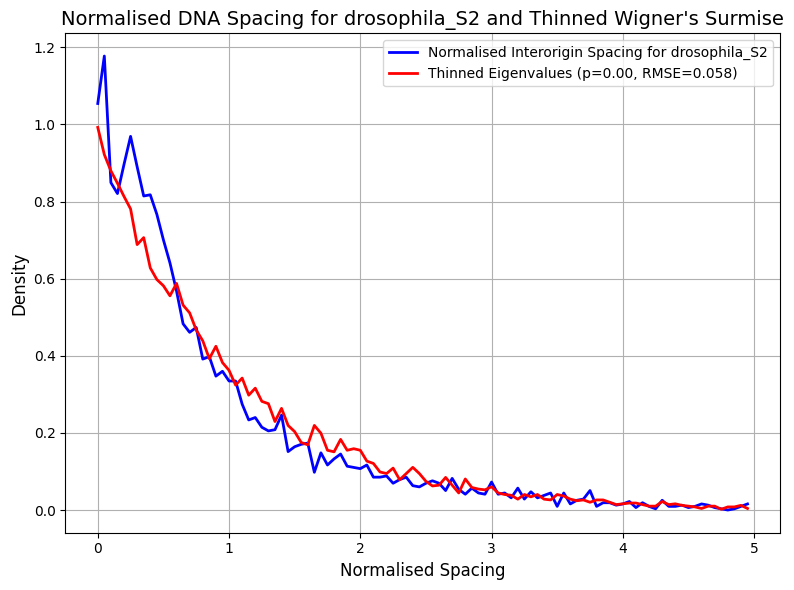

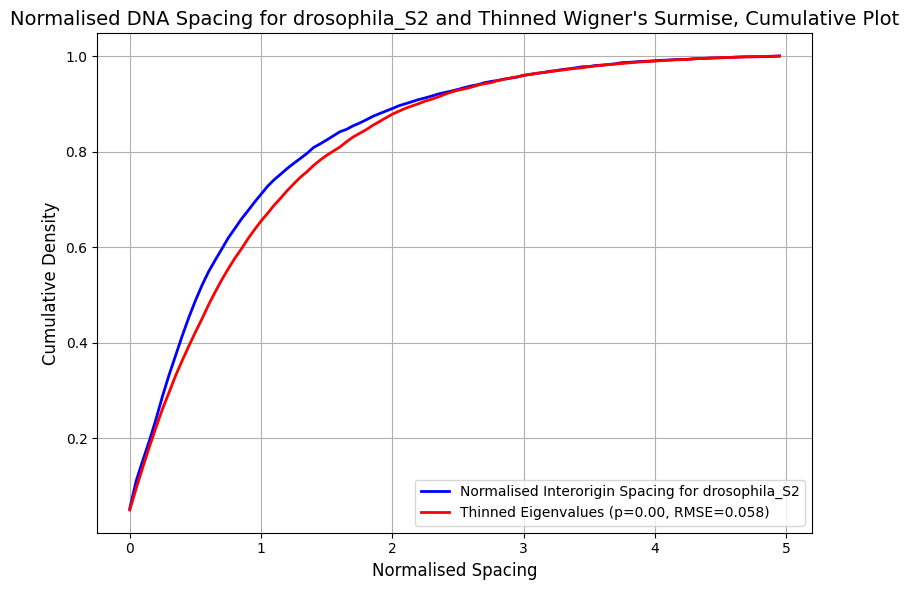

Done with:  drosophila_S2


human_K562_Interorigin_spacing.csv
Extracting File:  human_K562
Creating Histogram for:  human_K562
1.0
Plotting DNA and Thinned for:  human_K562


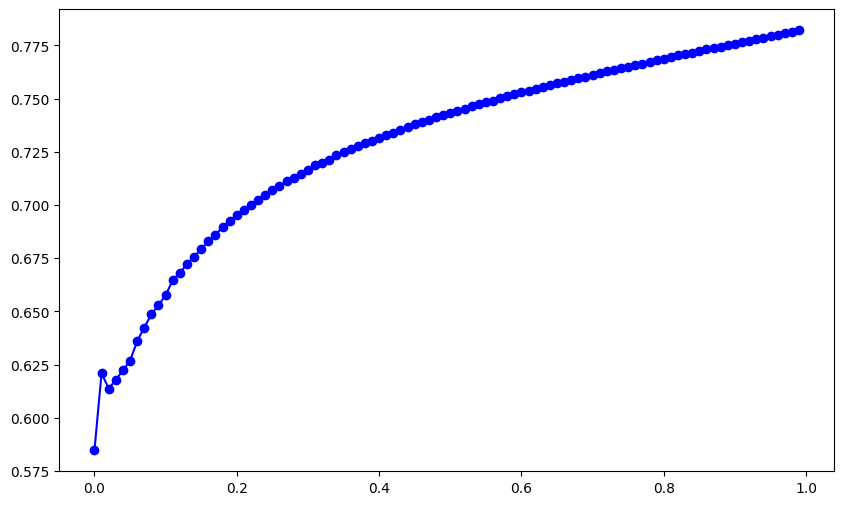

Minimum p value in coarse search: 0.0 with RMSE: 0.5848150933119854


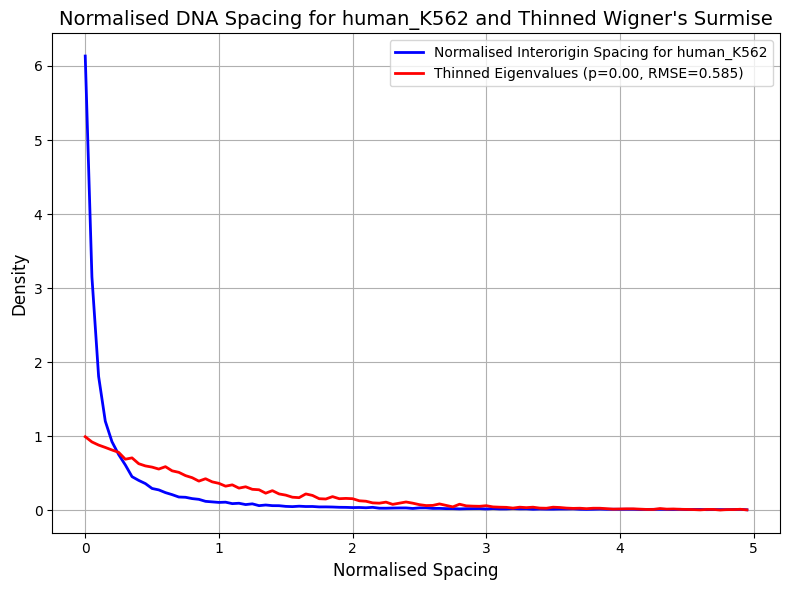

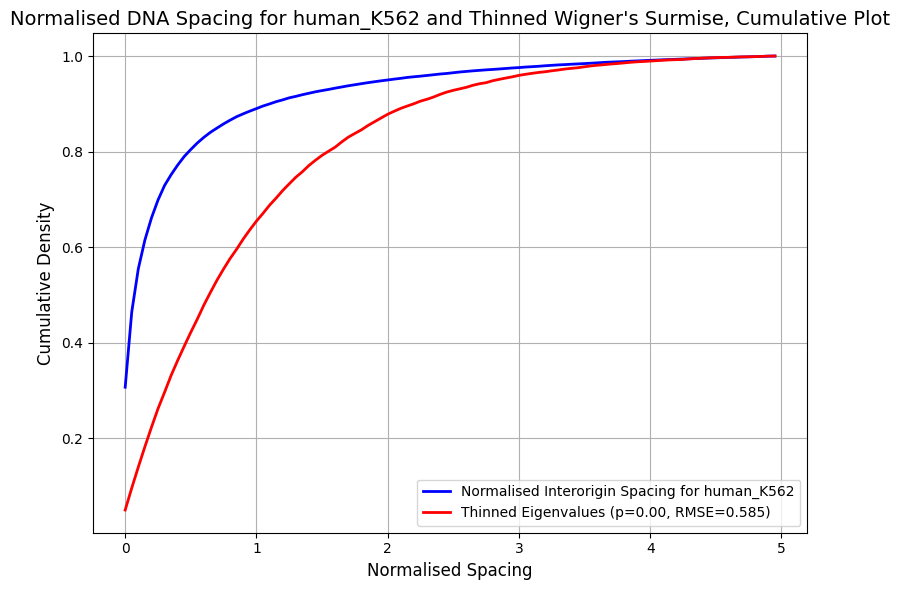

Done with:  human_K562


human_MCF7_Interorigin_spacing.csv
Extracting File:  human_MCF7
Creating Histogram for:  human_MCF7
0.9999999999999997
Plotting DNA and Thinned for:  human_MCF7


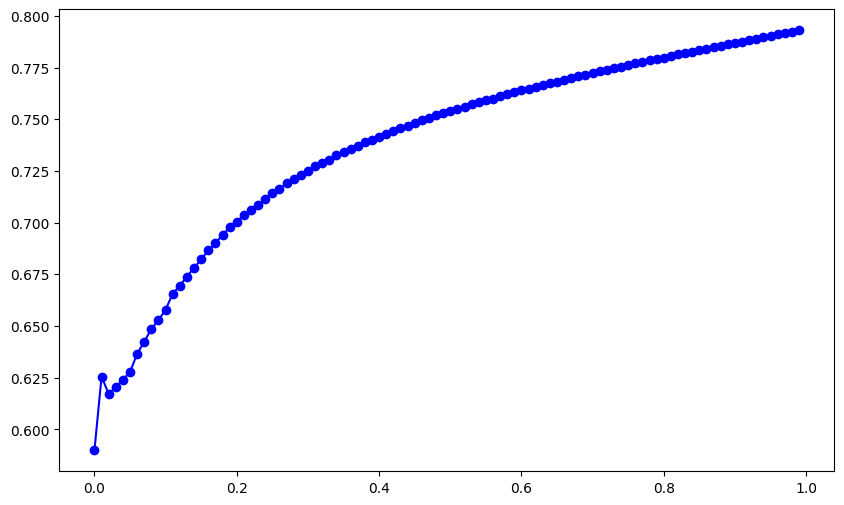

Minimum p value in coarse search: 0.0 with RMSE: 0.589845798850195


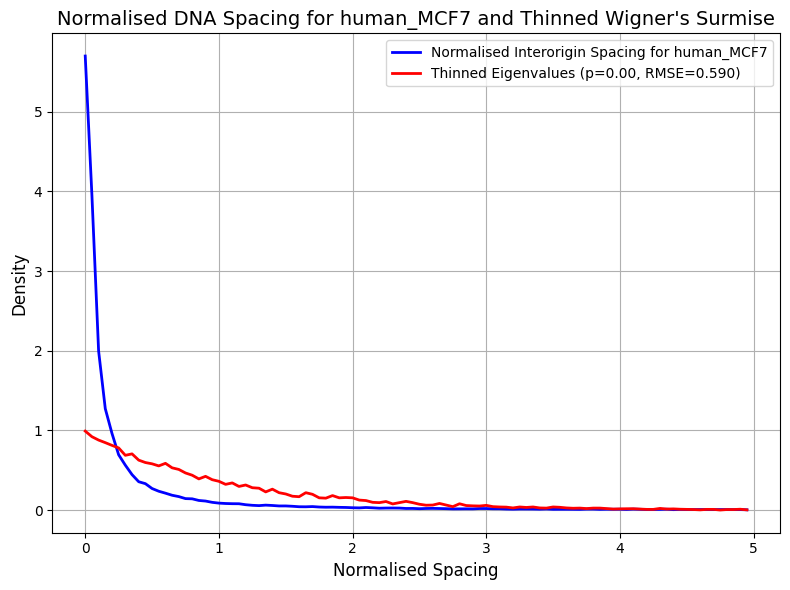

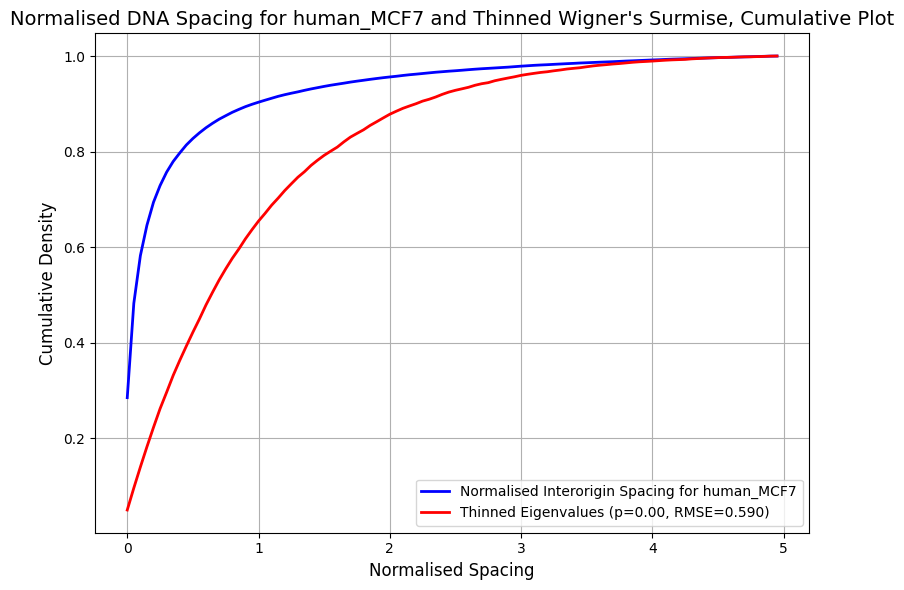

Done with:  human_MCF7


k_lactis_Interorigin_spacing.csv
Extracting File:  k_lactis
Creating Histogram for:  k_lactis
1.0
Plotting DNA and Thinned for:  k_lactis


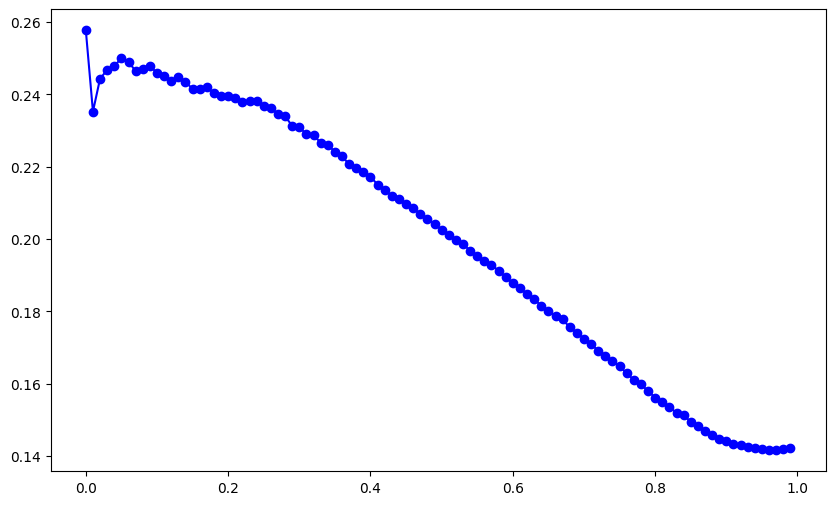

Minimum p value in coarse search: 0.96 with RMSE: 0.14162291090465234


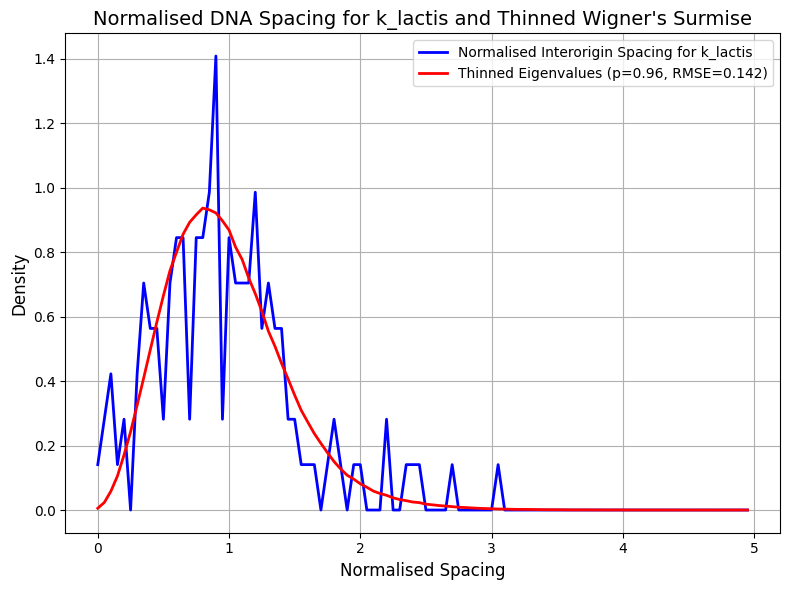

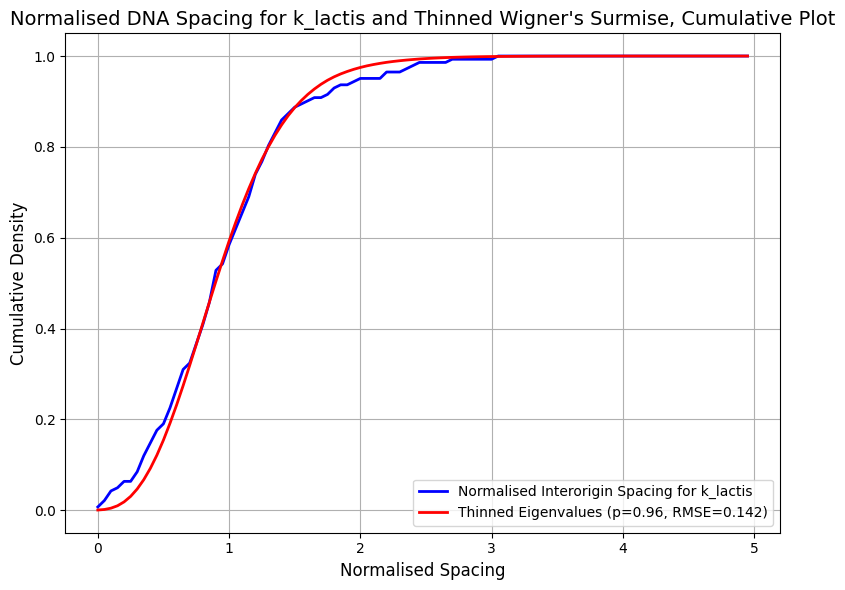

Done with:  k_lactis


L_waltii_Interorigin_spacing.csv
Extracting File:  L_waltii
Creating Histogram for:  L_waltii
1.0
Plotting DNA and Thinned for:  L_waltii


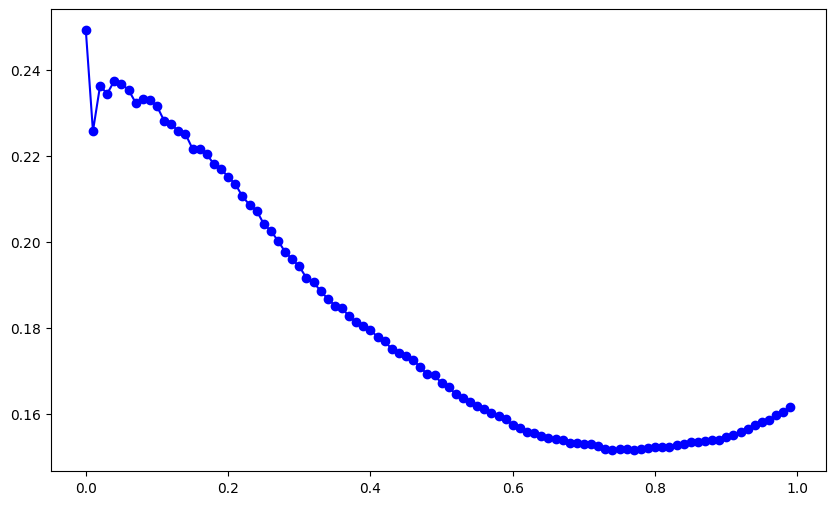

Minimum p value in coarse search: 0.74 with RMSE: 0.15149794381388867


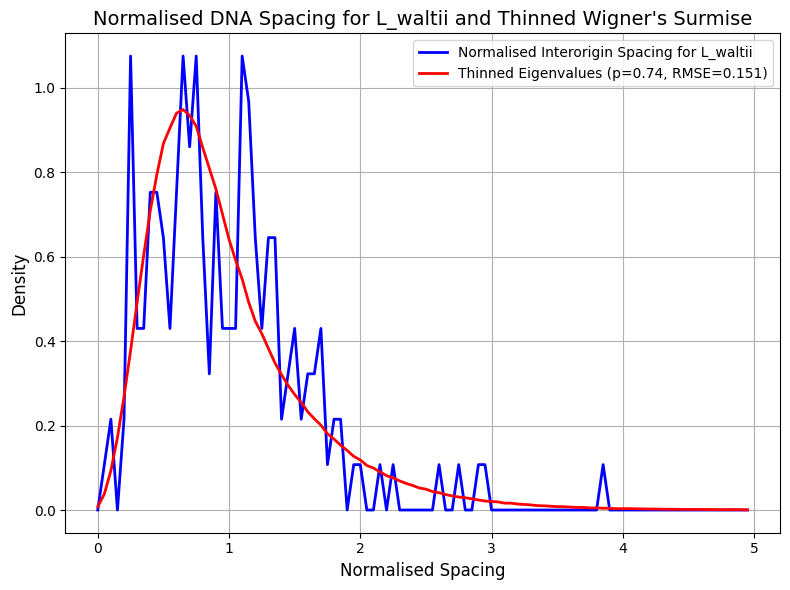

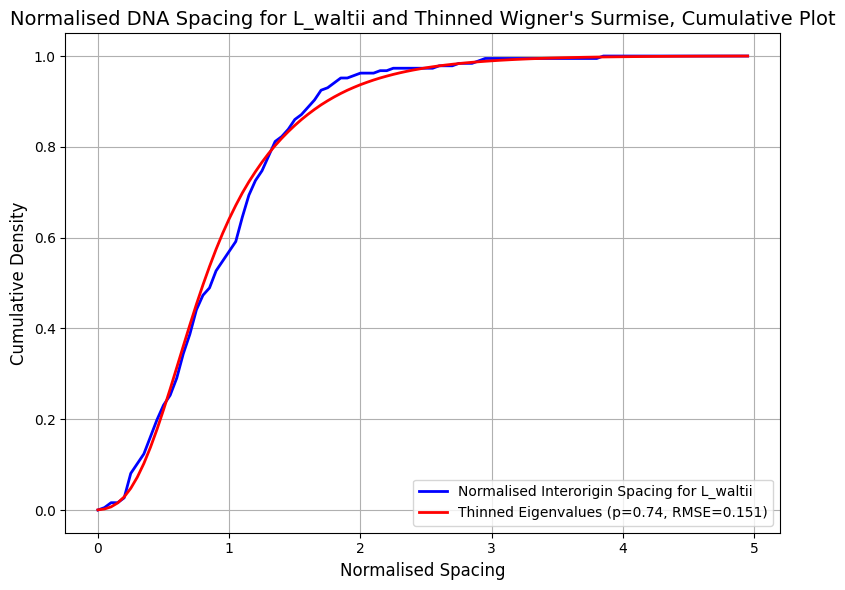

Done with:  L_waltii


mouse_ES1_Interorigin_spacing.csv
Extracting File:  mouse_ES1
Creating Histogram for:  mouse_ES1
1.0
Plotting DNA and Thinned for:  mouse_ES1


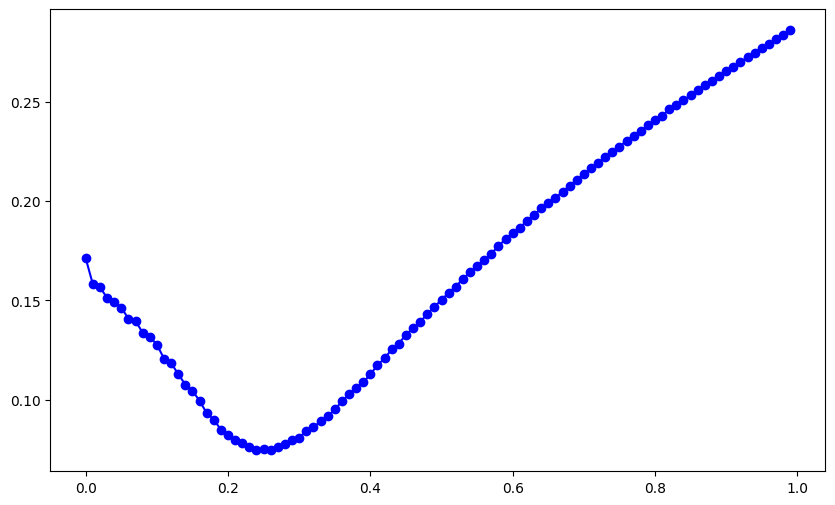

Minimum p value in coarse search: 0.24 with RMSE: 0.07464881010823152


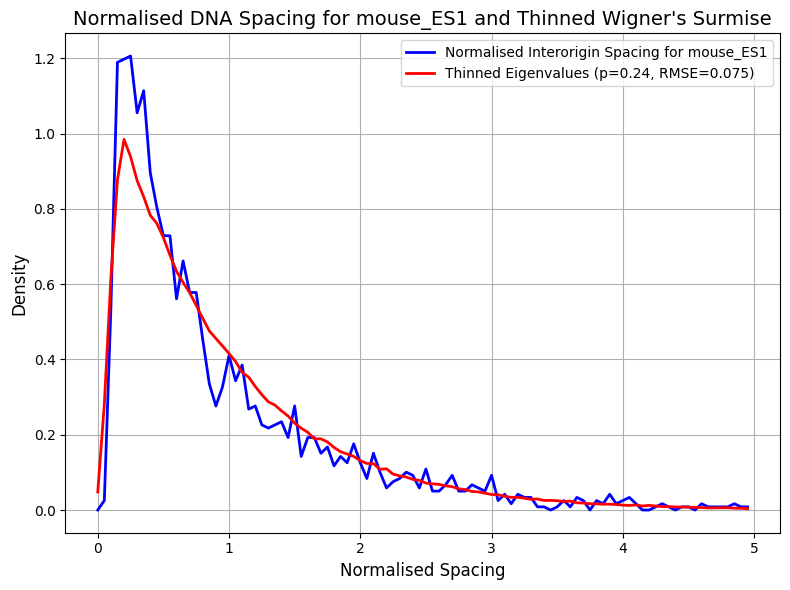

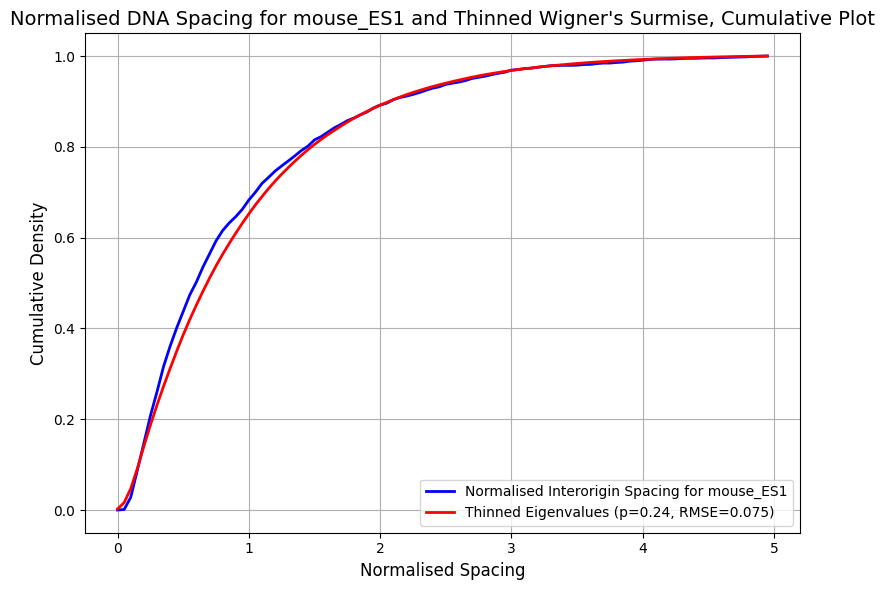

Done with:  mouse_ES1


mouse_MEF_Interorigin_spacing.csv
Extracting File:  mouse_MEF
Creating Histogram for:  mouse_MEF
1.0
Plotting DNA and Thinned for:  mouse_MEF


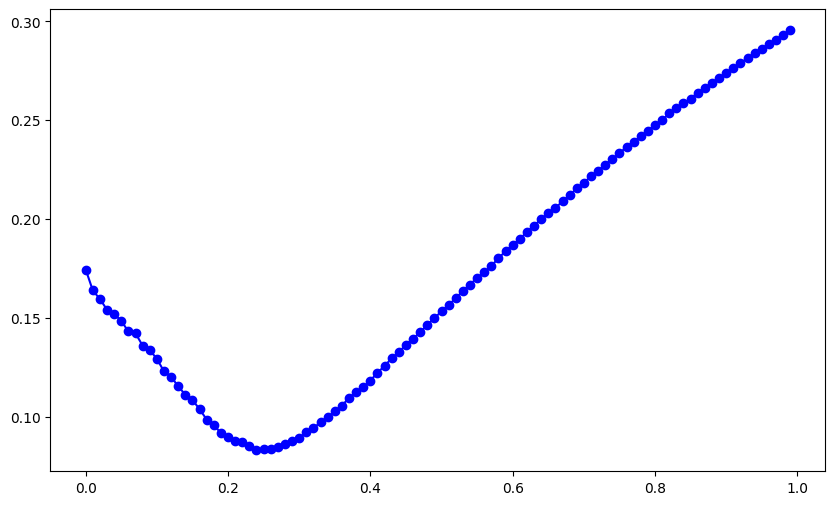

Minimum p value in coarse search: 0.24 with RMSE: 0.0829087273959687


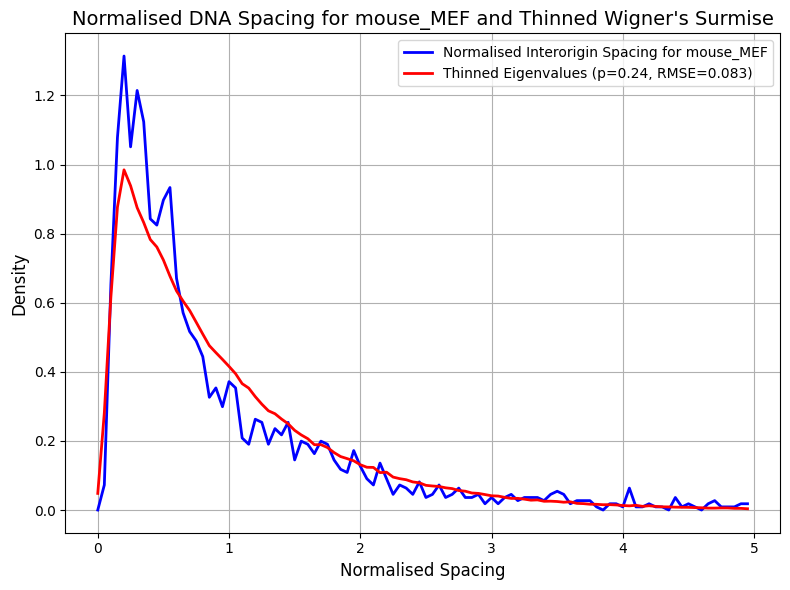

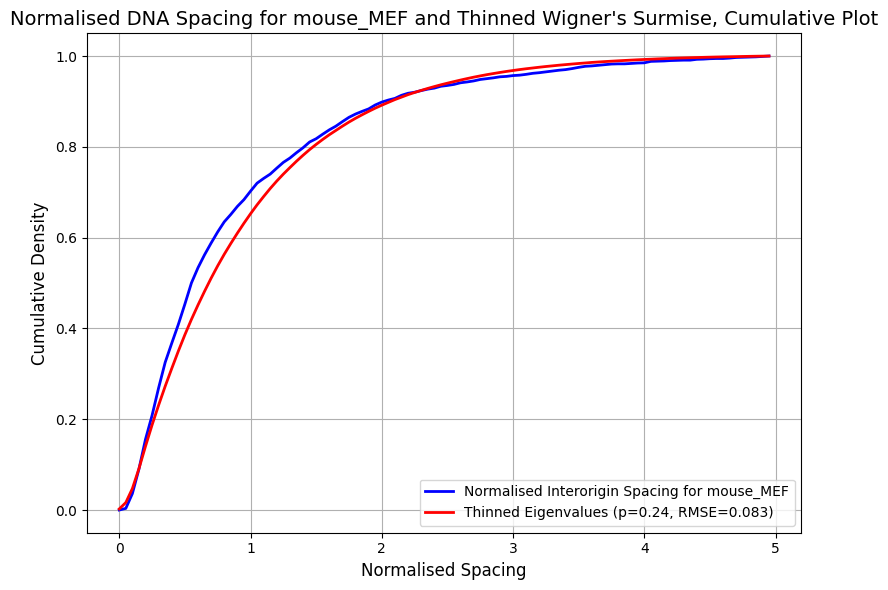

Done with:  mouse_MEF


mouse_P19_Interorigin_spacing.csv
Extracting File:  mouse_P19
Creating Histogram for:  mouse_P19
1.0000000000000002
Plotting DNA and Thinned for:  mouse_P19


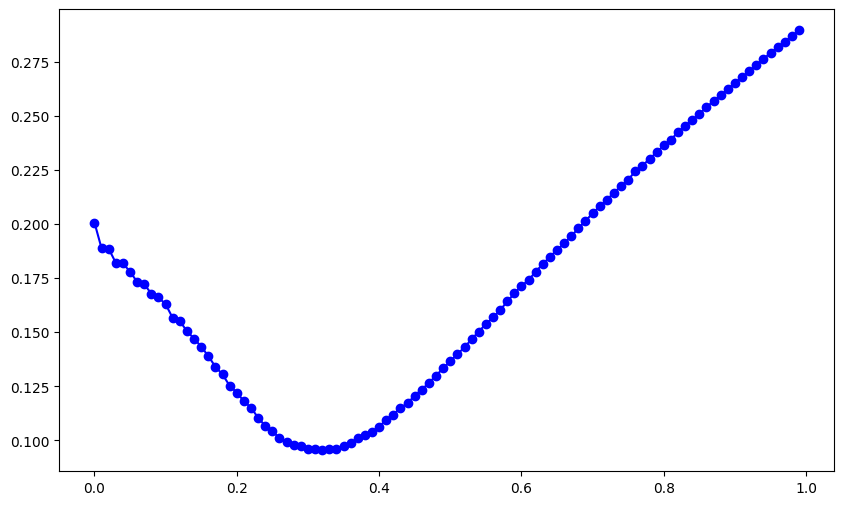

Minimum p value in coarse search: 0.32 with RMSE: 0.09544736640466248


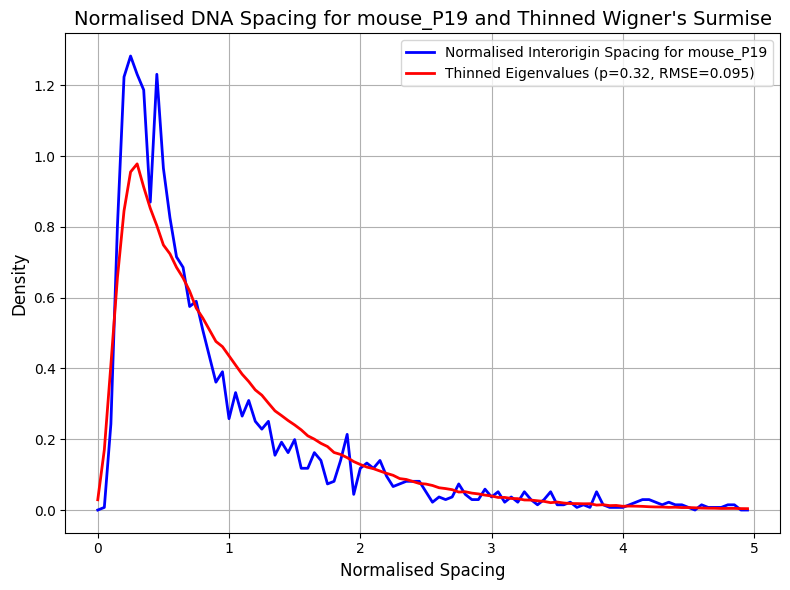

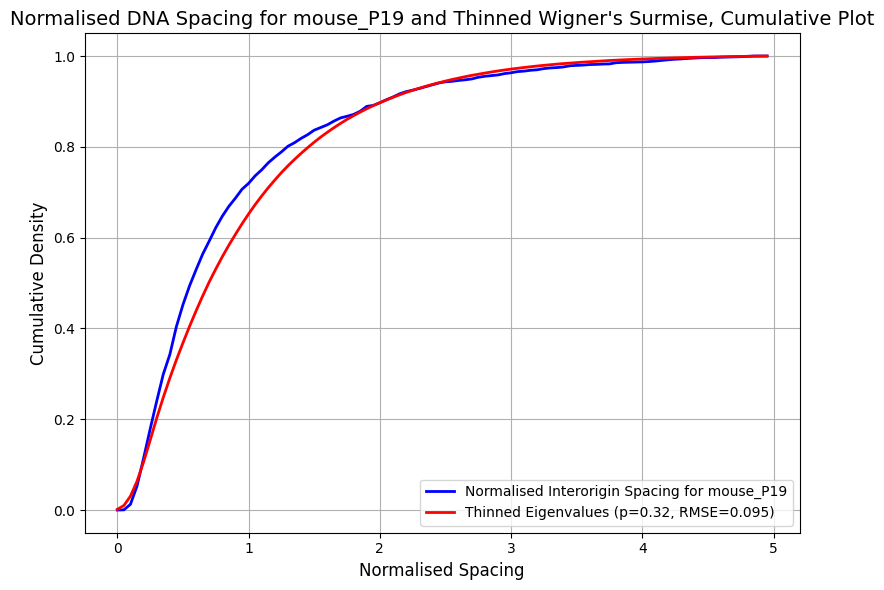

Done with:  mouse_P19


s_cerevisiae_Interorigin_spacing.csv
Extracting File:  s_cerevisiae
Creating Histogram for:  s_cerevisiae
1.0
Plotting DNA and Thinned for:  s_cerevisiae


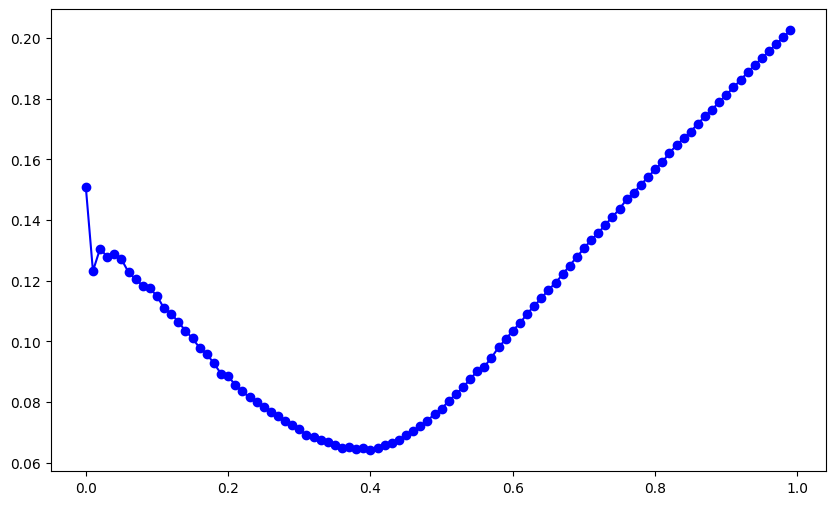

Minimum p value in coarse search: 0.4 with RMSE: 0.06411819223816724


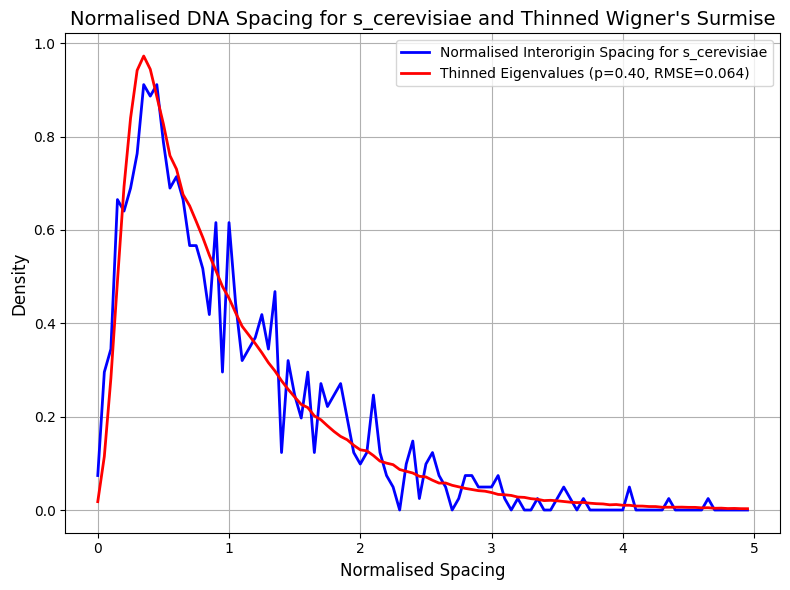

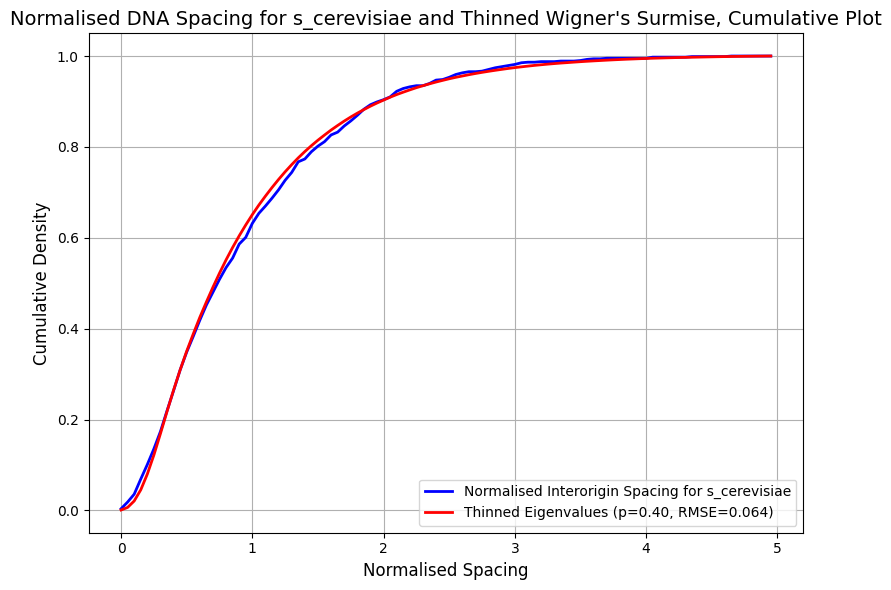

Done with:  s_cerevisiae




In [9]:

for filename in os.listdir('processeddata'):
    print(filename)
    name = filename.split('_Interorigin')[0]
    print("Extracting File: ", name)
    dna = RMT.file_extractor(name, "Interorigin_spacing")
    #print(dna)

    print("Creating Histogram for: ", name)
    dnahist, bins = RMT.dna_histogram(dna, Lower=0, Upper=5, binno=100)

    print("Plotting DNA and Thinned for: ", name)
    RMT.plot_dna_and_thinned(name, dnahist, ThinnedDict=ThinnedDict)
    print("Done with: ", name)
    print("\n")
    
